<a href="https://colab.research.google.com/github/van-dang/FEniCS-Colab/blob/master/mooc_hpfem_ode_3body.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


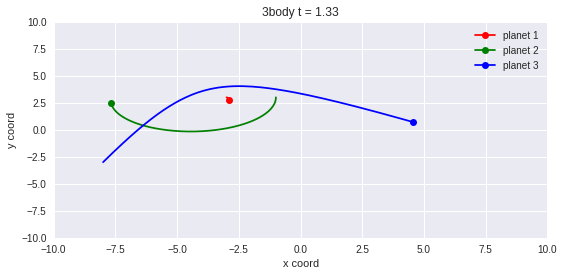

KeyboardInterrupt: ignored

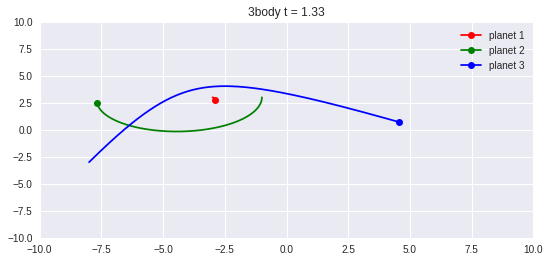

In [3]:
import matplotlib.pyplot as plt

from pylab import *; M = 3  # M number of particles

def step(f, t0, u0, k, method): # One step for ODE: u' = f(t, u), u(0) = u0, returns u(t + k)
    thetadict = {"Forward Euler": 0., "Backward Euler": 1., "Trapezoid": 0.5}; theta = thetadict[method]
    M = 5; t = t0 + k; u = u0 # Starting guess
    for i in range(0, M): # M fixed-point iterations
        u = u0 + (1. - theta)*k*f(t0, u0) + theta*k*f(t, u)
    return u

def solve(f, I, u0, k, method): # Solve ODE u' = f(t, u), u(0) = u0, I = [t0, T], returns array of t and u
    tarr = linspace(I[0], I[1], (I[1] - I[0])/k + 1); uarr = zeros([size(u0), tarr.size]); uarr[:, 0] = u0
    t = I[0]; T = I[1]; u = u0; i = 1
    for t in tarr[1:]: u0 = u; u = step(f, t - k, u0, k, method); uarr[:, i] = u; i += 1
    return [tarr, uarr]

def f_3body(t, u):
    fval[:] = 0.; m = [200, 4, 1]; K = 0.*100.0; L = 0.*2.0 # Mass m, stiffness E, rest length L
    for i0 in range(0, M):
        for i1 in range(0, M):
            if(i0 != i1):
                r = norm(u[i1:2*M:M] - u[i0:2*M:M]); e = (u[i1:2*M:M] - u[i0:2*M:M])/r; # radius and direction
                fval[i0 + 2*M::M] += (K*(r - L)*e + m[i1]*m[i0]*e/r**2) / m[i0] # Elastic and gravity forces
    fval[:2*M] = u[2*M:]; return fval

def plot_simple_anim(tarr, uarr, I, pl, ax, fig, j):
    ax.cla(); u = uarr[:, j]; t = tarr[j]; T = I[1]; N = 2*M
    ax.plot(u[0:N:3][0], u[0:N:3][1], 'r-o', u[1:N:3][0], u[1:N:3][1], 'g-o', u[2:N:3][0], u[2:N:3][1], 'b-o');
    ax.plot(uarr[0*M+0, :j], uarr[1*M+0, :j], 'r-');  ax.plot(uarr[0*M+1, :j], uarr[1*M+1, :j], 'g-');
    ax.plot(uarr[0*M+2, :j], uarr[1*M+2, :j], 'b-');
    ax.set_xlim([-10., 10.]); ax.set_ylim([-10., 10.]); ax.set_xlabel("x coord"); ax.set_ylabel("y coord");
    ax.legend(["planet 1", "planet 2", "planet 3"]); ax.set_title("3body t = %2.2f" % t); pl.canvas.draw()
    plt.tight_layout(); dpl = display(pl, display_id="test");

    return (pl, ax)

u0 = zeros(4*M); x = zeros([M, 2]); v = zeros([M, 2]); a = zeros((M, 2)); fval = zeros(4*M) # Initial arrays
x = stack([[-3., 3.], [-1., 3.], [-8., -3.]]); v = stack([[0., 0.], [0., -12.], [4., 9.]]) # Initial values
u0[:] = concatenate([x.flatten("F"), v.flatten("F")]);  # Pack values

I = [0., 20.]; k = 0.01; [tarr, uarr] = solve(f_3body, I, u0, k, "Trapezoid")

pl, ax = plt.subplots(); fig = plt.gcf(); fig.set_size_inches(8, 4)

for j in range(0, size(tarr), 1): pl, ax = plot_simple_anim(tarr, uarr, I, pl, ax, fig, j);